In [111]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams

COLOR = 'black'
plt.style.use("default")
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['figure.figsize'] = (28, 18)
rcParams['figure.dpi'] = 50
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#ebebeb'
rcParams['legend.fontsize'] = 25
rcParams['axes.titlesize'] = 60
rcParams['axes.labelsize'] = 50
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

In [9]:
df = pd.read_csv('traccion_deformacion.txt', delimiter='\t', header=None,)

In [44]:
df[0].iloc[-1]

0.99958

In [77]:
popt

array([17.99381451,  2.19450492])

In [85]:
df[df[0] == 0.02]

,0,1
96,0.02,0.85714


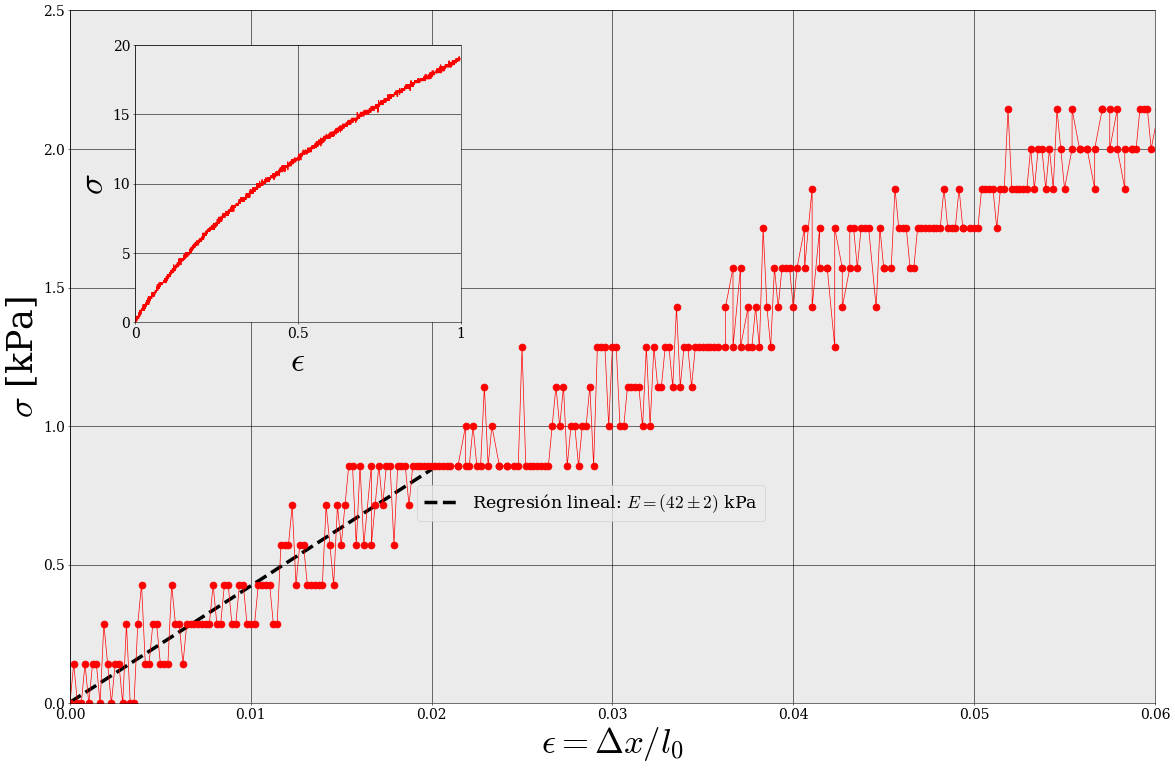

In [130]:
# INSET AXES

fig, ax = plt.subplots()

x1, x2, y1, y2 = df[0].iloc[0], df[0].iloc[-1], df[1].iloc[0], df[1].iloc[-1]  # subregion of the original image
axins = ax.inset_axes(
    [0.06, 0.55, 0.3, 0.4],
    yticks = [int(i) for i in np.arange(0,20 + 1,5)], xticks=[0,0.5,1], xticklabels=['0','0.5','1'])

axins.plot(df[0],df[1], color='r')
axins.set_xlim([0,1])
axins.set_ylim([0,20])
axins.set_ylabel('$\sigma$')
axins.set_xlabel('$\epsilon$')
ax.indicate_inset_zoom(axins, edgecolor="black")

f_lineal = lambda x,a,b: a*x + b

popt, popv = curve_fit(f_lineal,df[0][:96],df[1][:96])

xs = np.linspace(0,0.02)
y_pred = f_lineal(xs,*popt)

err = np.sqrt(np.diag(popv))

ax.set_ylabel('$\sigma$ [kPa]')
ax.set_xlabel('$\epsilon = \Delta x / l_0$')
ax.set_xlim([0,0.06])
ax.set_ylim([0,2.5])
ax.plot(xs,y_pred,color='k', ls='--', lw=5, label=f'Regresión lineal: $E = ({popt[0]:.0f} \pm {err[0]:.0f})$ kPa')
ax.plot(df[0],df[1],'o-', lw=1, ms=10, color='r')
ax.legend(loc='lower center', bbox_to_anchor = (0.48, 0.25))